In [34]:
fdir = "../hanglog/single_pendulum2"

import os, sys
sys.path.append("..")
import hacktrack.loaders
import pandas, numpy, math
from scipy import optimize
from matplotlib import pyplot as plt
from hacktrack import loaders, utils
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib notebook


logfiles = os.listdir(fdir)
print(logfiles)
fLog = os.path.join(fdir, logfiles[0])

['hdata-2021-01-01_18-44-59.log']


In [16]:
import sys
sys.path.append("..")
import hacktrack.loaders
fd = hacktrack.loaders.FlyDat(fLog)

Extracting knowndate from filename: 2021-01-01
E:1, Y:21292, Z:21125, aZ:1166, aA:1166, aF:1146
linAdifftime 7393.203309692672 count 1269
Made for Q 0 last index 0
Made for V 0 last index 0
Loading aQV as no pQV records
Made for aQ 0 last index 0
Made for aV 0 last index 0
Missing GPS data, so setting t0 to 2021-01-01 18:44:11.232203


In [17]:
fd.LoadC("ZYE")

Made for Z 21125 last index 21125
Warning, using guessed (not GPS) timing corrected value on Z 21125
pCattrname pZ
Made for Y 21292 last index 21292
Warning, using guessed (not GPS) timing corrected value on Y 21292
pCattrname pY
BAD VALUES 1 [(0, 'End(42419,3479)\n')]
Made for E 1 last index 0
Warning, using guessed (not GPS) timing corrected value on E 1


2

In [18]:
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib notebook

import scipy.signal as sig
pitch=fd.pE[fd.pE.m==1]
roll=fd.pE[fd.pE.m==2]
#filt = sig.savgol_filter(a.d, 19,2)
#plt.plot(filt)
pitch

,m,d


In [19]:
import numpy as np

def set_zero(p):
    p.loc[:,'pitch'] = p['pitch']-p['pitch'].iloc[0]
    p.loc[:,'roll'] = p['roll']-p['roll'].iloc[0]
    p.loc[:,'heading'] = p['heading']-p['heading'].iloc[0]
    return p

def calc_a(p,g):
    set_zero(p)
    p.loc[:,'ax_calc']= -g * np.sin(np.radians(p['roll']))
    p.loc[:,'ay_calc']= -g * np.sin(np.radians(p['pitch']))
    return p

<IPython.core.display.Javascript object>


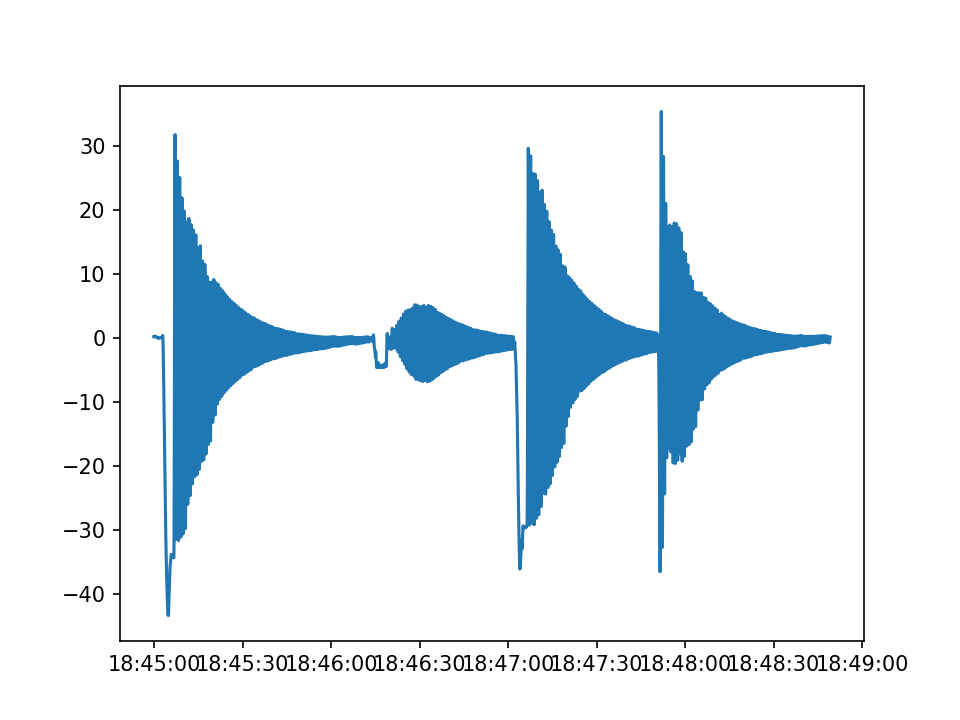

In [30]:

fig =plt.figure()
pilot = fd.pZ[~fd.pZ.bad]
wing = fd.pY[~fd.pY.bad]

plt.plot(pilot.pitch)

In [45]:

t0 = pandas.Timestamp('2021-01-01 18:47:52')
t1 = pandas.Timestamp('2021-01-01 18:48:25')
pilot_short = pilot[t0:t1]
def find_rot(q):
    a = utils.qvec((q),(pilot_short.ax,pilot_short.ay,pilot_short.az))
    g = utils.qvec((q),(pilot_short.gx,pilot_short.gy,pilot_short.gz))
    ga = ((a[0]+g[0]),(a[1]+g[1]),(a[2]+g[2]-9.81))
    print(q)
    return sum((ga[0]**2+ga[1]**2+ga[2]**2)**0.5)
optimize.minimize(find_rot, (192.0,10446.0,12613.0,-435.0),method='Nelder-Mead')
#ga = find_rot((277.98465819,  9003.63149301, 18909.87393095,   -36.11592406))
#ga

[  192. 10446. 12613.  -435.]
[  201.6 10446.  12613.   -435. ]
[  192.  10968.3 12613.   -435. ]
[  192.   10446.   13243.65  -435.  ]
[  192.   10446.   12613.    -456.75]
[  196.8   10707.15  12928.325  -413.25 ]
[  199.2    10837.725  13085.9875  -391.5   ]
[  186.      10903.0125  13164.81875  -413.25   ]
[  192.6      11131.51875  13440.728125  -402.375   ]
[  192.9       10690.828125  13854.5921875  -386.0625   ]
[  193.35       10552.0921875  14475.38828125  -361.59375   ]
[  193.575      11266.17421875 13839.81132813  -349.359375  ]
[  194.3625     11676.26132813 14137.89199219  -306.5390625 ]
[  203.75625    11195.78613281 14405.17919922  -317.75390625]
[  202.734375   10999.41357422 14611.49536133  -286.31835938]
[  207.8015625  10933.36098633 15196.87897949  -228.29003906]
[  200.43515625 11341.02531738 16021.68172607  -215.58837891]
[  201.05273438 11592.67547607 17489.52883911  -127.63256836]
[  210.13652344 12146.94977417 16139.35122375  -128.51403809]
[  202.92041016 11

[2.23687742e+02 1.10775974e+04 1.69007677e+04 1.39969966e+01]
[2.23711019e+02 1.10762664e+04 1.69019708e+04 1.39502855e+01]
[2.23702450e+02 1.10772090e+04 1.68993347e+04 1.40009179e+01]
[2.23705403e+02 1.10764744e+04 1.69022288e+04 1.39531978e+01]
[2.23708641e+02 1.10757824e+04 1.69030199e+04 1.39392090e+01]
[2.23697191e+02 1.10766316e+04 1.69011005e+04 1.39500373e+01]
[2.23708149e+02 1.10763100e+04 1.69021974e+04 1.39587637e+01]
[2.23723684e+02 1.10752710e+04 1.69046010e+04 1.39200006e+01]
[2.23700613e+02 1.10766770e+04 1.69012308e+04 1.39655457e+01]
[2.23703950e+02 1.10770815e+04 1.69007939e+04 1.39746873e+01]
[2.23707469e+02 1.10761072e+04 1.69024634e+04 1.39480786e+01]
[2.23704103e+02 1.10764524e+04 1.69017495e+04 1.39497901e+01]
[2.23707137e+02 1.10763456e+04 1.69020854e+04 1.39565203e+01]
[2.23707716e+02 1.10762237e+04 1.69016465e+04 1.39570173e+01]
[2.23700448e+02 1.10764104e+04 1.69017423e+04 1.39632954e+01]
[2.23708377e+02 1.10763024e+04 1.69019137e+04 1.39535380e+01]
[2.23704

 final_simplex: (array([[2.23708641e+02, 1.10761982e+04, 1.69021725e+04, 1.39520350e+01],
       [2.23708641e+02, 1.10761982e+04, 1.69021726e+04, 1.39520348e+01],
       [2.23708641e+02, 1.10761982e+04, 1.69021725e+04, 1.39520358e+01],
       [2.23708641e+02, 1.10761982e+04, 1.69021725e+04, 1.39520352e+01],
       [2.23708642e+02, 1.10761982e+04, 1.69021726e+04, 1.39520343e+01]]), array([1262.42137892, 1262.42137892, 1262.42137892, 1262.42137892,
       1262.42137892]))
           fun: 1262.421378915954
       message: 'Optimization terminated successfully.'
          nfev: 285
           nit: 147
        status: 0
       success: True
             x: array([2.23708641e+02, 1.10761982e+04, 1.69021725e+04, 1.39520350e+01])

In [48]:
#Using first oscillations
(277.98465819,  9003.63149301, 18909.87393095,   -36.11592406)
#Using last set of oscillations:
(2.23708641e+02, 1.10761982e+04, 1.69021725e+04, 1.39520350e+01)

(223.708641, 11076.1982, 16902.1725, 13.952035)

In [49]:
q=(2.23708641e+02, 1.10761982e+04, 1.69021725e+04, 1.39520350e+01)
a_corr = utils.qvec((q),(pilot.ax,pilot.ay,pilot.az))
g_corr = utils.qvec((q),(pilot.gx,pilot.gy,pilot.gz))
ga_corr = ((a_corr[0]+g_corr[0]),(a_corr[1]+g_corr[1]),(a_corr[2]+g_corr[2]))
ga_corr

(2021-01-01 18:44:59.909203   -0.038149
 2021-01-01 18:44:59.913203   -0.041728
 2021-01-01 18:44:59.937203   -0.037261
 2021-01-01 18:44:59.947203   -0.033271
 2021-01-01 18:44:59.954203   -0.037794
                                 ...   
 2021-01-01 18:48:49.158203    0.000764
 2021-01-01 18:48:49.170203   -0.024348
 2021-01-01 18:48:49.177203   -0.015180
 2021-01-01 18:48:49.185203   -0.032328
 2021-01-01 18:48:49.196203   -0.026029
 Length: 20530, dtype: float64,
 2021-01-01 18:44:59.909203    0.029655
 2021-01-01 18:44:59.913203    0.015299
 2021-01-01 18:44:59.937203    0.028990
 2021-01-01 18:44:59.947203    0.019823
 2021-01-01 18:44:59.954203    0.029389
                                 ...   
 2021-01-01 18:48:49.158203   -0.002486
 2021-01-01 18:48:49.170203   -0.022434
 2021-01-01 18:48:49.177203   -0.018442
 2021-01-01 18:48:49.185203   -0.004099
 2021-01-01 18:48:49.196203   -0.014994
 Length: 20530, dtype: float64,
 2021-01-01 18:44:59.909203     9.733466
 2021-01-01 18:

In [47]:
g_wing = (wing.gx**2+wing.gy**2+wing.gz**2)**0.5
g_pilot = (pilot.gx**2+pilot.gy**2+pilot.gz**2)**0.5
plt.plot(g_wing)

In [22]:
wing['gx_app'] = wing['ax']+wing['gx']
wing['gy_app'] = wing['ay']+wing['gy']
wing['gz_app'] = wing['az']+wing['gz']
g_app_wing = (wing.gx_app**2+wing.gy_app**2+wing.gz_app**2)**0.5


/home/timbo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/timbo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/timbo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [23]:
plt.plot(g_app_wing)

In [24]:
ptest = calc_a(pilot, 9.81)


/home/timbo/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/timbo/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


In [25]:
ax_err = ptest['ax'] - ptest['ax_calc']
ay_err = ptest['ay'] - ptest['ay_calc']

<IPython.core.display.Javascript object>


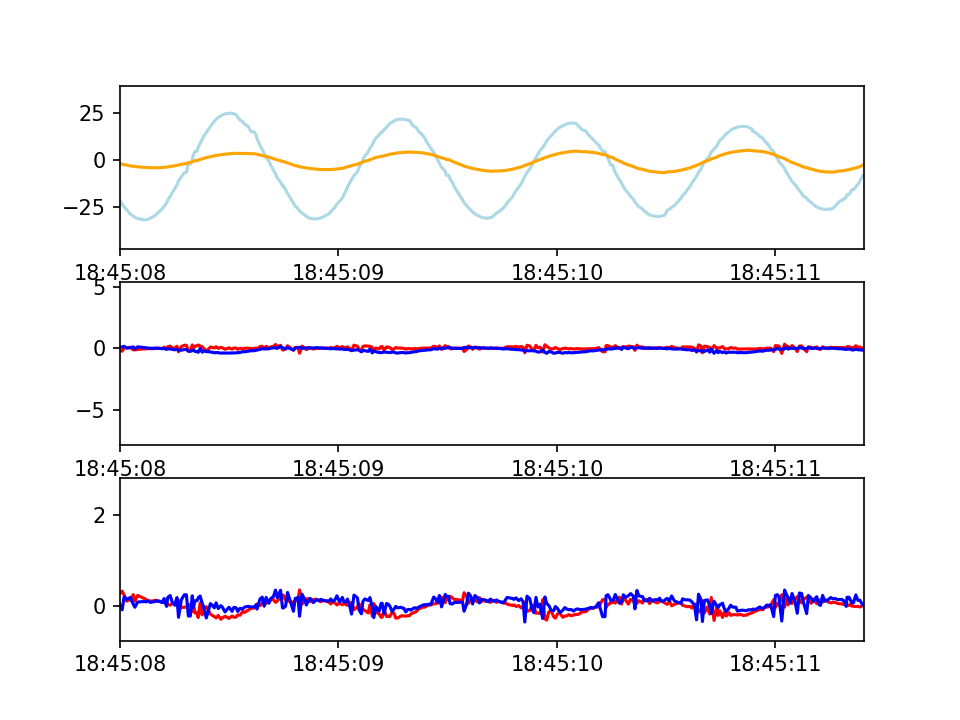

In [50]:
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib notebook

base = plt.subplot(311)
plt.plot(ptest.pitch, color = 'lightblue')
plt.plot(ptest.roll, color = 'orange')
#plt.plot(ptest.ax, color = 'darkred')
#plt.plot(ptest.ax_calc, color = 'red')
#plt.plot(ptest.ay, color = 'darkblue')
#plt.plot(ptest.ay_calc, color = 'blue')

err = plt.subplot(312, sharex = base)
plt.plot(ax_err,color ='red')
plt.plot(ay_err,color ='blue')

err = plt.subplot(313, sharex = base)
plt.plot(ga_corr[0],color ='red')
plt.plot(ga_corr[1],color ='blue')


In [ ]:
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib notebook


plt.plot(pZ.pitch)
plt.plot(pZ.roll)
plt.plot(pZ.ax, color = 'black')


In [ ]:
import numpy as np
import scipy as sp
g=9.81
L = g * (7/(9*2*np.pi))**2
L

In [ ]:
plt.plot(pZ.roll)
plt.plot(-pY.roll)

In [ ]:
plt.plot(pZ.heading)
plt.plot(pY.heading+180)

In [ ]:
import hacktrack.clickables
hacktrack.clickables.plotinteractivegpstrack(fd)